<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [126]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [127]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [128]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [129]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [130]:
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


### Data cleanup

In [131]:
boston_df = boston_df.drop('Unnamed: 0', axis=1)

In [132]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [133]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Descriptive Statistics and Visualization

#### Task 1 - Median value of owner-occupied homes

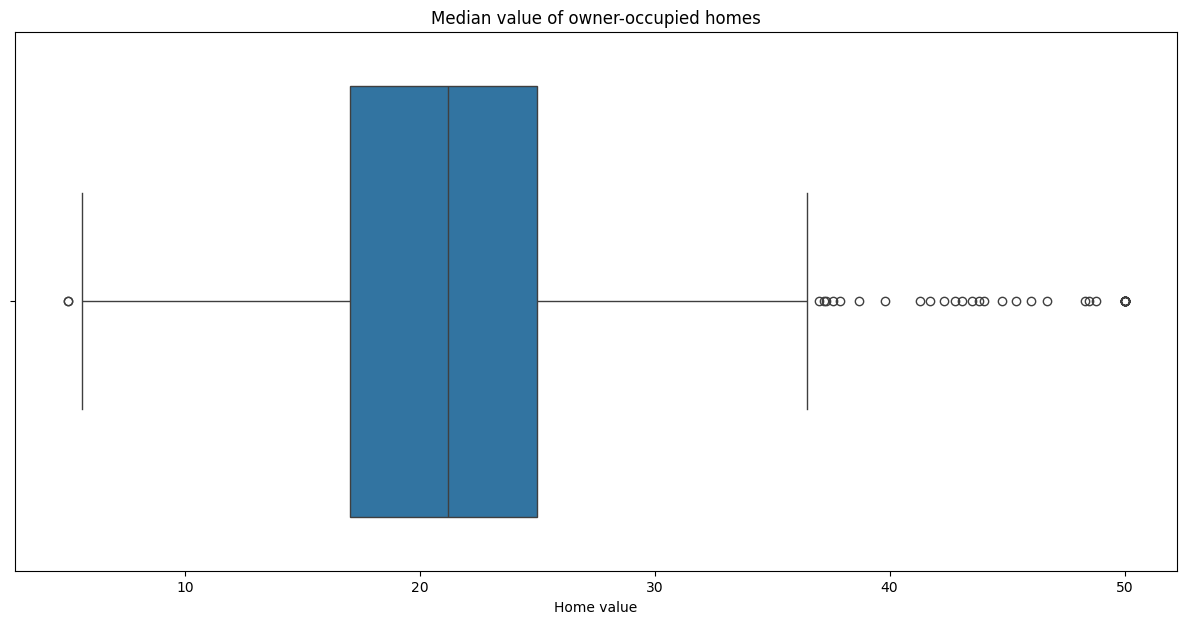

In [134]:
plt.figure(figsize=(15, 7))
sns.boxplot(boston_df, x ='MEDV')
plt.title('Median value of owner-occupied homes')
plt.xlabel('Home value')
plt.show()

#### Task 2 - Charles river variable

<Figure size 1500x700 with 0 Axes>

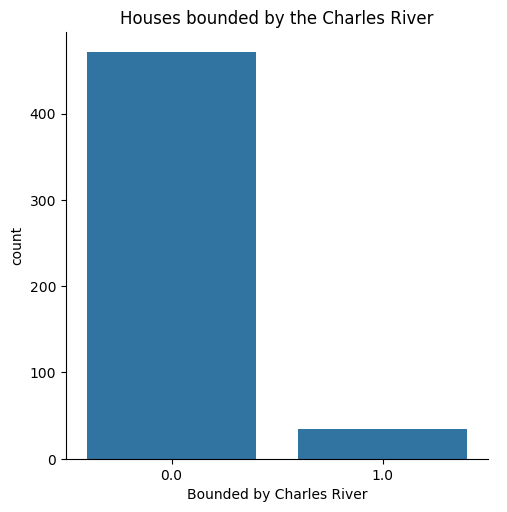

In [135]:
plt.figure(figsize=(15, 7))
ax=sns.catplot(x=boston_df['CHAS'], kind ='count')
plt.title('Houses bounded by the Charles River')
plt.xlabel('Bounded by Charles River')
plt.show()

#### Task 3 - Relationship between the houses median value and age

In [136]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [137]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years


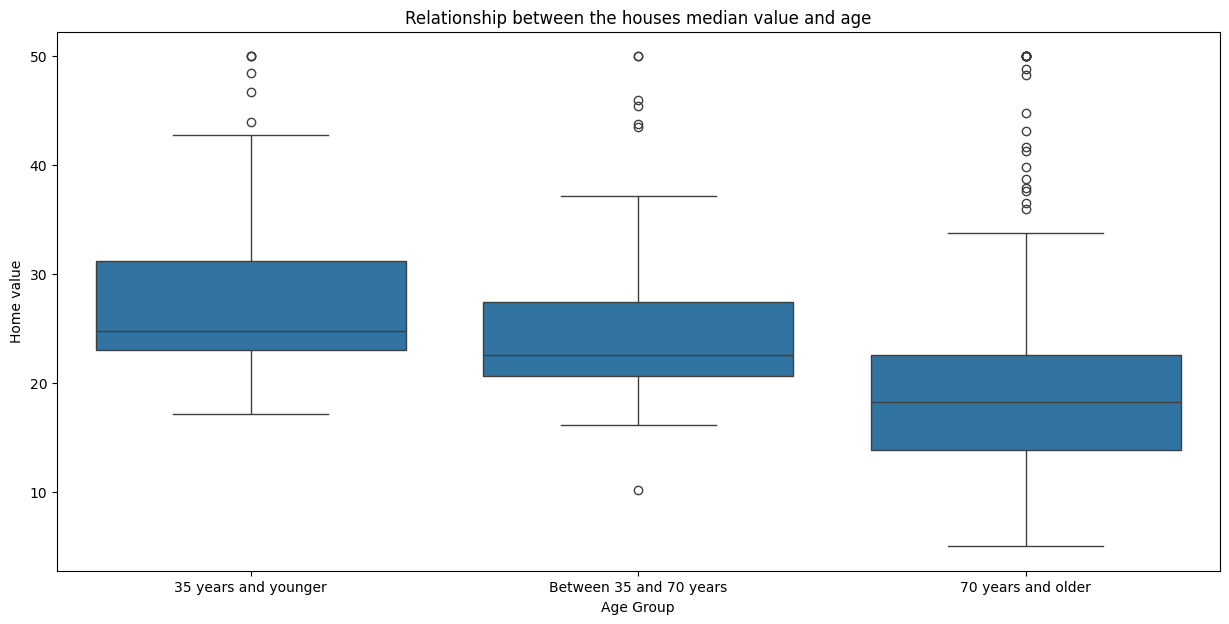

In [138]:
plt.figure(figsize=(15, 7))
sns.boxplot(boston_df, x= 'age_group', y='MEDV', order=['35 years and younger','Between 35 and 70 years','70 years and older'])
plt.title('Relationship between the houses median value and age')
plt.xlabel('Age Group')
plt.ylabel('Home value')
plt.show()

#### Task 4 - Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

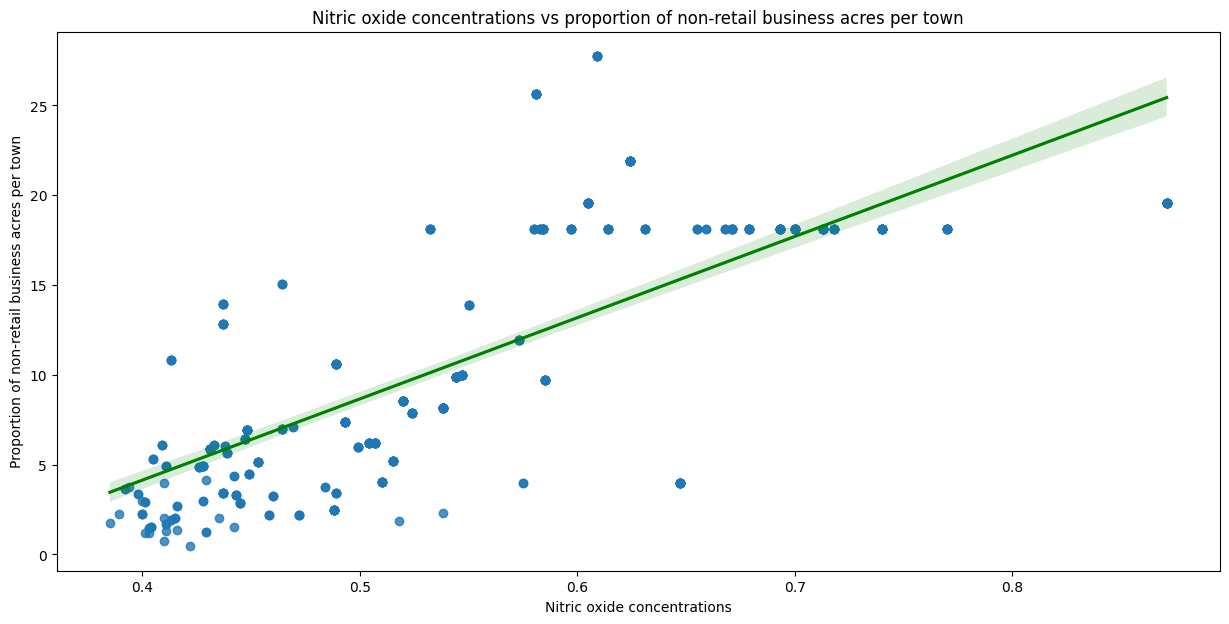

In [139]:
plt.figure(figsize=(15, 7))
sns.regplot(boston_df, x='NOX', y='INDUS', line_kws=dict(color='green'))
plt.title('Nitric oxide concentrations vs proportion of non-retail business acres per town')
plt.xlabel('Nitric oxide concentrations')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()

**Conclusion**: There seem to be a lineal relation between INDUS and NOX until NOX = 0.6

#### Task 5 The pupil to teacher ratio

<ipython-input-140-ab6b96731b22>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=boston_df.PTRATIO, bins=10, kde=False)


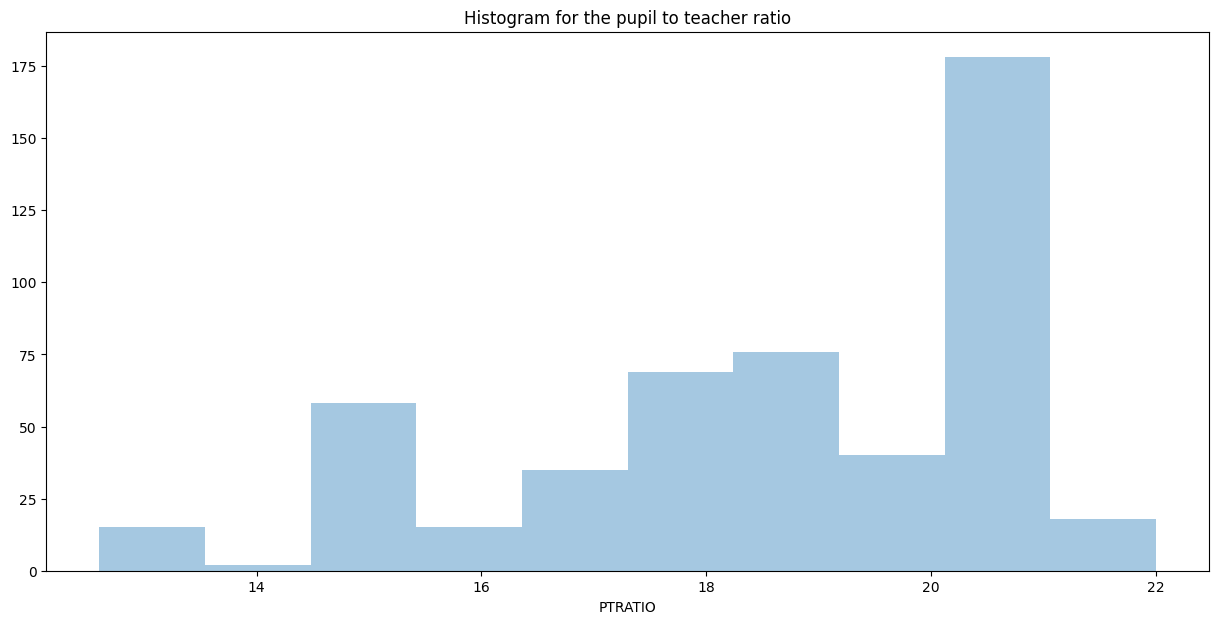

In [140]:
plt.figure(figsize=(15, 7))
sns.distplot(a=boston_df.PTRATIO, bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio")
plt.show()

**Conclusion**: The Pupil to teacher ratio is highest at about 20-21 range.

## Fact findings

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis test

*   $H_0: β1$ = 0 (House values are not significantly affected by the presence of Charles River)
*   $H_1: β1$ is not equal to 0 (The presence of Charles River significantly affects the house value)

In [141]:
# boston_df["CHAS"].value_counts()
a = boston_df[boston_df['CHAS']==0]['MEDV']
b = boston_df[boston_df['CHAS']==1]['MEDV']
alpha = 0.05

In [142]:
# T-test
scipy.stats.ttest_ind(a,b,equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion**: Since the p-value less than alpha of 0.05, we reject null hypothesis. There is statistical difference between the value of houses bounded or not by Charles River.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis test

*   $H_0:  U_1 = U_2 = U_3$
*   $H_1:$ At least one of the mean differs.

In [143]:
# boston_df.columns
low = boston_df[boston_df['age_group']=='35 years and younger']['MEDV']
mid = boston_df[boston_df['age_group']=='Between 35 and 70 years']['MEDV']
high = boston_df[boston_df['age_group']=='70 years and older']['MEDV']

F_stats,p_value = scipy.stats.f_oneway(low,mid,high)
print('F statistics= {0}, p-value = {1}'.format(F_stats, p_value))

F statistics= 36.40764999196599, p-value = 1.7105011022702984e-15


**Conclusion**: Since the p-value is lower than alpha, we reject the null hypotesis. There is at least one mean that differ.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis test

*   $H_0:$  NOX and INDUS are not correlated
*   $H_1:$ NOX and INDUS are correlated

In [144]:
pearson,p_value = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print('Pearson statistic = {0}, p_value = {1}'.format(pearson, p_value))

Pearson statistic = 0.7636514469209192, p_value = 7.913361061210442e-98


**Conclusion**: Since the p-value is lower than alpha, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis test

*   $H_0:$ Weighted distances to five Boston employment centers are not related to homes median value
*   $H_1:$ Weighted distances to five Boston employment centres are related to homes median value

In [145]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predict = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        03:10:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[2] Coefficient of correllation  = 0.249

The coeeficient of correlation implies a weak correlation between DIS and MEDV. We reject the null hypothesis p_value equal to 0.